In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
pollution = pd.read_excel('PM2.5climate.xlsx')
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
pollution.shape

(43824, 13)

Because the data have been preprocess, most of the variables will not be changed.
For data cleaning, we will check duplicated and empty variables and then make a decision whether to 
keep, change or drop the variables

In [4]:
print('Total Missing values:', round((pollution['pm2.5'].isnull().sum()/43824)*100,2),'%')

Total Missing values: 4.72 %


As seen in the exploratory data, only one attribute have 2061 missing values, which is 0.047 or 4.7% of the total dataset observations.

---

## Dropping Variables
## Missing Values

In [5]:
pollution.drop(columns = ['No','hour', 'year', 'day'], inplace=True)
pollution.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,1,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,1,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,1,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
pollution.dropna(inplace = True)
pollution.reset_index(drop = True, inplace = True)
pollution.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,1,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,1,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,1,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [7]:
pollution['pm2.5'].isnull().sum()

0

In [46]:
pollution.shape

(41757, 9)

All the missing values have been dropped because, as observed in the exploration, the missing values are in the target variable. If they had not been dropped, that would skew our regression results because it would not give any prediction for the level of pollution.

In addition, the missing values will not overall impact the dataset as it accounts for only 5% total. We chose not to replace the missing values because it was such a small portion of the dataset and replacing it could cause bias and it was a safer option to remove them than replace them.

No. has been dropped because it does not give any information since it is simply the row number of the observation.

Hour was dropped because it is a minute detail in pollution levels and we want to explore larger trends in the level s of pollution. We want to understand the long-run trend in the level of pollution and hour is a very short-term measure.

Similarly, day is also a short-term measure that we are not interested in exploring. 

Year was dropped because in our exploration it was found that it was not correlated with the level fo pollution and, hence, we decided to drop it.

Let us rename the variables for better understanding:

In [8]:
pollution.columns

Index(['month', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [9]:
names = dict(DEWP = 'dewTemp', TEMP = 'temp', PRES = 'pres', cbwd = 'windDir',
             Iws = 'windSpeed', Is = 'cumSnow', Ir = 'cumRain')
pollution.rename(columns = names, inplace = True)
pollution.columns

Index(['month', 'pm2.5', 'dewTemp', 'temp', 'pres', 'windDir', 'windSpeed',
       'cumSnow', 'cumRain'],
      dtype='object')

In [10]:
pollution['windDir'].replace({'cv':'SW'}, inplace = True)
pollution['windDir'].value_counts()

SE    14573
NW    13484
SW     8944
NE     4756
Name: windDir, dtype: int64

---

## Outliers

Let us explore if there are any outliers in this dataset:

Text(0.5, 1.0, 'Hours of Cumulated Rain v/s PM 2.5 levels')

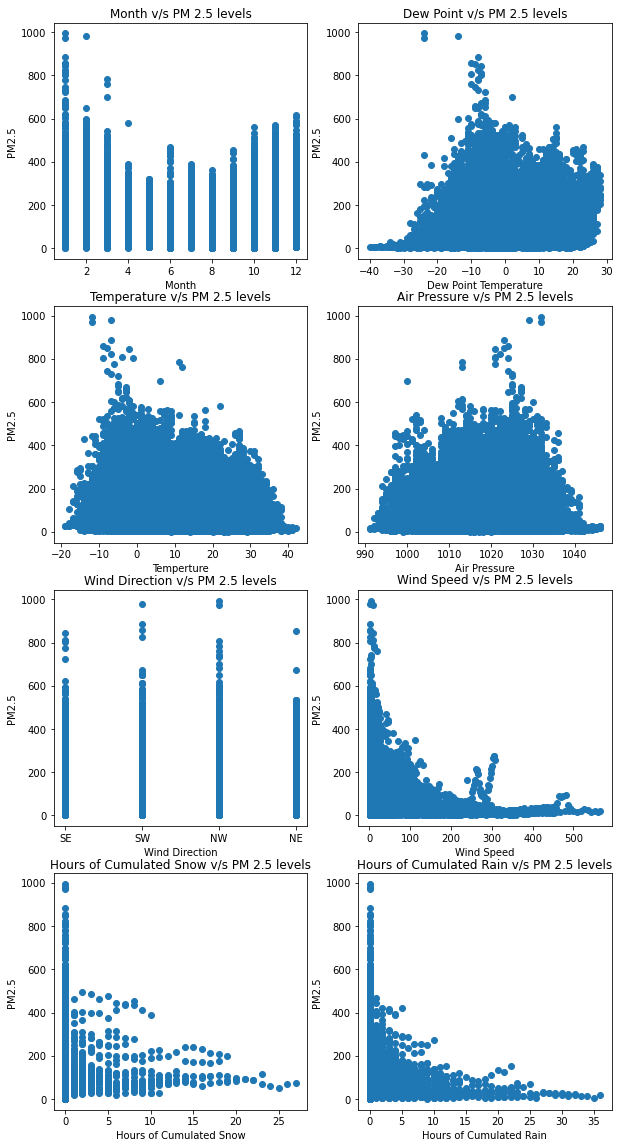

In [41]:
fig, ax = plt.subplots(4, 2, figsize = (10, 20))
#fig.tight_layout()

ax[0,0].scatter(y = pollution['pm2.5'], x = pollution['month'])
ax[0,0].set_xlabel('Month')
ax[0,0].set_ylabel('PM2.5')
ax[0,0].set_title('Month v/s PM 2.5 levels')

ax[0, 1].scatter(y = pollution['pm2.5'], x = pollution['dewTemp'])
ax[0, 1].set_xlabel('Dew Point Temperature')
ax[0, 1].set_ylabel('PM2.5')
ax[0, 1].set_title('Dew Point v/s PM 2.5 levels')

ax[1,0].scatter(y = pollution['pm2.5'], x = pollution['temp'])
ax[1,0].set_xlabel('Temperture')
ax[1,0].set_ylabel('PM2.5')
ax[1,0].set_title('Temperature v/s PM 2.5 levels')

ax[1,1].scatter(y = pollution['pm2.5'], x = pollution['pres'])
ax[1,1].set_xlabel('Air Pressure')
ax[1,1].set_ylabel('PM2.5')
ax[1,1].set_title('Air Pressure v/s PM 2.5 levels')

ax[2,0].scatter(y = pollution['pm2.5'], x = pollution['windDir'])
ax[2,0].set_xlabel('Wind Direction')
ax[2,0].set_ylabel('PM2.5')
ax[2,0].set_title('Wind Direction v/s PM 2.5 levels')

ax[2,1].scatter(y = pollution['pm2.5'], x = pollution['windSpeed'])
ax[2,1].set_xlabel('Wind Speed')
ax[2,1].set_ylabel('PM2.5')
ax[2,1].set_title('Wind Speed v/s PM 2.5 levels')

ax[3,0].scatter(y = pollution['pm2.5'], x = pollution['cumSnow'])
ax[3,0].set_xlabel('Hours of Cumulated Snow')
ax[3,0].set_ylabel('PM2.5')
ax[3,0].set_title('Hours of Cumulated Snow v/s PM 2.5 levels')

ax[3,1].scatter(y = pollution['pm2.5'], x = pollution['cumRain'])
ax[3,1].set_xlabel('Hours of Cumulated Rain')
ax[3,1].set_ylabel('PM2.5')
ax[3,1].set_title('Hours of Cumulated Rain v/s PM 2.5 levels')

Looking at the above dashboard, it is visible that there are a few outliers in the month, dew point, temperature, and air pressure variables. This is because there are a few points that have much higher pm2.5 levels for certain x-values. This shows that there are certain observations where there are exceptionally high levels of air pollution for a certain month in a year. Similarly, there are certain temperature, dew point temperature, and air pressure values for which there are exceptionally high air pollution levels. These high values of air pollution are probably influenced by external factors that were not controlled in this dataset. Hence, it is probably better to remove any outliers. However, let us see how many outliers there are in totality.

The scatterplots of the wind speed, cumulated hours fo snow and rain are interesting because they follow a 'L' patter because of which it is hard to distinguish if there are outliers. However, outliers in these variables will be able to be seen with the z-value calculations.

In [42]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(pollution[['month', 'pm2.5', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain']]))
print(z)

[[1.59626706 0.3301143  1.22979123 ... 0.4449441  0.07105723 0.13740842]
 [1.59626706 0.53652547 1.16050789 ... 0.42700666 0.07105723 0.13740842]
 [1.59626706 0.65602667 0.88337455 ... 0.40906923 0.07105723 0.13740842]
 ...
 [1.58830091 0.96267141 1.64549124 ... 4.41045788 0.07105723 0.13740842]
 [1.58830091 0.9843989  1.64549124 ... 4.49147866 0.07105723 0.13740842]
 [1.58830091 0.94094391 1.57620791 ... 4.55456201 0.07105723 0.13740842]]


In [43]:
threshold = 3
print(np.where(z > 3))

(array([    5,     6,    23, ..., 41754, 41755, 41756]), array([6, 6, 6, ..., 5, 5, 5]))


In [44]:
outliers = pollution[(z >=3)]
outliers

,month,pm2.5,dewTemp,temp,pres,windDir,windSpeed,cumSnow,cumRain
5,1,109.0,-7,-6.0,1022.0,SE,7.14,3,0
6,1,105.0,-7,-6.0,1023.0,SE,8.93,4,0
23,1,126.0,-8,-6.0,1027.0,SE,55.43,3,0
24,1,90.0,-7,-6.0,1027.0,SE,58.56,4,0
25,1,63.0,-8,-6.0,1026.0,SE,61.69,5,0
...,...,...,...,...,...,...,...,...,...
41752,12,8.0,-23,-2.0,1034.0,NW,231.97,0,0
41753,12,10.0,-22,-3.0,1034.0,NW,237.78,0,0
41754,12,10.0,-22,-3.0,1034.0,NW,242.70,0,0
41755,12,8.0,-22,-4.0,1034.0,NW,246.72,0,0


Let us create a new dataframe without the outliers:

In [45]:
pollution.shape

(41757, 9)

In [47]:
pollution2= pollution[(z < 3).all(axis=1)]
pollution2.shape

(39061, 9)

Approximately 2000 rows have been removed from the original data frame to account for any outliers. 

In [49]:
print('The data frame without outliers is', round((pollution2.shape[0]/pollution.shape[0]),2),'% smaller than the original dataframe')

The data frame without outliers is 0.94 % smaller than the original dataframe


---

## Visualizations
##### Boxplots